<div align="center">
  <h1>АДЭФС. Лабораторная работа №4</h1>
</div>
<div align="right">
  <h3>Студента 3 курса 8 группы</h3>
</div>
<div align="right">
  <h3>Зарецкого A.O.</h3>
</div>
<div align="center">
  <h2>Отчет о выполнении</h2>
</div>
<div align="center">
  <h2>Содержание</h2>
</div>

1. Загрузка и подготовка данных
2. Подготовка признаков для дискриминантного анализа
3. Обучение модели линейного дискриминантного анализа
4. Режим переклассификации (обучающая выборка)
5. Режим экзамена (тестовая выборка)
6. Расчет вероятностей ошибок
7. Коэффициенты классифицирующих функций
8. Анализ отклонений прогнозных рейтингов
9. Визуализация результатов
10. Итоговый отчет

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## 1. Загрузка и подготовка данных

In [ ]:
df = pd.read_csv(r'../data/Annual 2005-2011.csv')

#истинные классы кредитоспособности
conditions = [
    (df['k1'] > 1.5) & (df['k5'] > 0.3) & (df['k15'] > 15),
    (df['k1'] > 1) & (df['k5'] > 0.2) & (df['k15'] > 10),
    (df['k1'] > 0) & (df['k5'] > 0.1) & (df['k15'] > 5),
    (df['k1'] <= 0) | (df['k5'] <= 0.1) | (df['k15'] <= 5)
]

choices = [1, 2, 3, 4]
df['true_class'] = np.select(conditions, choices, default=4)

print("Размерность данных:", df.shape)
print("\nРаспределение по классам:")
print(df['true_class'].value_counts().sort_index())

Размерность данных: (2695, 23)

Распределение по классам:
true_class
1      63
2     532
3    1403
4     697
Name: count, dtype: int64


## 2. Подготовка признаков для дискриминантного анализа

In [ ]:
features_lda = ['k1', 'k2', 'k4', 'k5', 'k6', 'k7', 'k9', 'k10', 'k11', 'k13', 'k14', 'k15', 'k19', 'k20']

X = df[features_lda]
y = df['true_class']

# разделение(10% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Данные подготовлены для LDA:")
print(f"Обучающая выборка: {X_train.shape[0]} наблюдений")
print(f"Тестовая выборка: {X_test.shape[0]} наблюдений")
print(f"Используемые признаки: {features_lda}")

Данные подготовлены для LDA:
Обучающая выборка: 2425 наблюдений
Тестовая выборка: 270 наблюдений
Используемые признаки: ['k1', 'k2', 'k4', 'k5', 'k6', 'k7', 'k9', 'k10', 'k11', 'k13', 'k14', 'k15', 'k19', 'k20']


## 3. Обучение модели линейного дискриминантного анализа

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

print("LDA модель обучена!")
print(f"Точность на обучающей выборке: {lda.score(X_train_scaled, y_train):.3f}")
print(f"Точность на тестовой выборке: {lda.score(X_test_scaled, y_test):.3f}")

LDA модель обучена!
Точность на обучающей выборке: 0.582
Точность на тестовой выборке: 0.626


## 4. Режим переклассификации (обучающая выборка)

In [ ]:
# предсказание на обучающей выборке
y_train_pred = lda.predict(X_train_scaled)

# матрица ошибок
classes = sorted(y_train.unique())
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train_percent = cm_train / cm_train.sum(axis=1, keepdims=True) * 100

print("Результаты переклассификации обучающей выборки")

train_freq = pd.DataFrame(cm_train, 
                         index=[f'Класс {i}' for i in range(1, 5)],
                         columns=[f'Прогноз {i}' for i in range(1, 5)])
train_freq['Всего'] = cm_train.sum(axis=1)

print("\nЧастота:")
print(train_freq)

train_pct = pd.DataFrame(cm_train_percent,
                        index=[f'Класс {i}' for i in range(1, 5)],
                        columns=[f'Прогноз {i}%' for i in range(1, 5)])
train_pct['Всего%'] = 100

print("\nПроценты:")
print(train_pct.round(1))

Результаты переклассификации обучающей выборки

Частота:
         Прогноз 1  Прогноз 2  Прогноз 3  Прогноз 4  Всего
Класс 1          1         10         44          2     57
Класс 2          5         95        369         10    479
Класс 3          6         86       1095         75   1262
Класс 4          2          2        402        221    627

Проценты:
         Прогноз 1%  Прогноз 2%  Прогноз 3%  Прогноз 4%  Всего%
Класс 1         1.8        17.5        77.2         3.5     100
Класс 2         1.0        19.8        77.0         2.1     100
Класс 3         0.5         6.8        86.8         5.9     100
Класс 4         0.3         0.3        64.1        35.2     100


## 5. Режим экзамена (тестовая выборка)

In [ ]:
y_test_pred = lda.predict(X_test_scaled)

test_classes = sorted(y_test.unique())
cm_test = confusion_matrix(y_test, y_test_pred, labels=classes)
cm_test_percent = cm_test / cm_test.sum(axis=1, keepdims=True) * 100

print("Результаты классификации экзаменационной выборки")

test_freq = pd.DataFrame(cm_test,
                        index=[f'Класс {i}' for i in range(1, 5)],
                        columns=[f'Прогноз {i}' for i in range(1, 5)])
test_freq['Всего'] = cm_test.sum(axis=1)

print("\nЧастота:")
print(test_freq)

test_pct = pd.DataFrame(cm_test_percent,
                       index=[f'Класс {i}' for i in range(1, 5)],
                       columns=[f'Прогноз {i}%' for i in range(1, 5)])
test_pct['Всего%'] = 100

print("\nПроценты:")
print(test_pct.round(1))

Результаты классификации экзаменационной выборки

Частота:
         Прогноз 1  Прогноз 2  Прогноз 3  Прогноз 4  Всего
Класс 1          0          1          4          1      6
Класс 2          0         15         36          2     53
Класс 3          0          7        127          7    141
Класс 4          0          0         43         27     70

Проценты:
         Прогноз 1%  Прогноз 2%  Прогноз 3%  Прогноз 4%  Всего%
Класс 1         0.0        16.7        66.7        16.7     100
Класс 2         0.0        28.3        67.9         3.8     100
Класс 3         0.0         5.0        90.1         5.0     100
Класс 4         0.0         0.0        61.4        38.6     100


## 6. Расчет вероятностей ошибок

In [ ]:
def calculate_error_probabilities(y_true, y_pred):
    results = []
    for class_label in sorted(np.unique(y_true)):
        mask = y_true == class_label
        n_total = mask.sum()
        n_errors = (y_pred[mask] != class_label).sum()
        error_prob = n_errors / n_total if n_total > 0 else 0
        prior_prob = (y_true == class_label).mean()
        
        results.append({
            'Класс': class_label,
            'Априорная_вероятность': prior_prob,
            'Условная_вероятность_ошибки': error_prob
        })
    
    return pd.DataFrame(results)

# ошибки для обучающей выборки
error_train = calculate_error_probabilities(y_train, y_train_pred)
unconditional_error_train = (y_train != y_train_pred).mean()

print("Оценки вероятностей ошибок при переклассификации")
print(error_train.round(3))
print(f"\nБезусловная вероятность ошибки: {unconditional_error_train:.3f} ({unconditional_error_train*100:.1f}%)")

# ошибки для тестовой выборки
error_test = calculate_error_probabilities(y_test, y_test_pred)
unconditional_error_test = (y_test != y_test_pred).mean()

print("Оценки вероятностей ошибок при классификации экзаменационной выборки")
print(error_test.round(3))
print(f"\nБезусловная вероятность ошибки: {unconditional_error_test:.3f} ({unconditional_error_test*100:.1f}%)")

Оценки вероятностей ошибок при переклассификации
   Класс  Априорная_вероятность  Условная_вероятность_ошибки
0      1                  0.024                        0.982
1      2                  0.198                        0.802
2      3                  0.520                        0.132
3      4                  0.259                        0.648

Безусловная вероятность ошибки: 0.418 (41.8%)
Оценки вероятностей ошибок при классификации экзаменационной выборки
   Класс  Априорная_вероятность  Условная_вероятность_ошибки
0      1                  0.022                        1.000
1      2                  0.196                        0.717
2      3                  0.522                        0.099
3      4                  0.259                        0.614

Безусловная вероятность ошибки: 0.374 (37.4%)


## 7. Коэффициенты классифицирующих функций

In [ ]:
coef = lda.coef_
intercept = lda.intercept_

coefficients_table = pd.DataFrame(
    coef.T,
    index=features_lda,
    columns=[f'd_{i}' for i in range(1, 5)]
)

constants = pd.DataFrame(
    [intercept],
    index=['Константа'],
    columns=[f'd_{i}' for i in range(1, 5)]
)

final_coefficients = pd.concat([coefficients_table, constants])

print("Коэффициенты классифицирующих функций")
print(final_coefficients.round(3))

Коэффициенты классифицирующих функций
             d_1    d_2    d_3    d_4
k1         0.552 -0.317 -0.115  0.424
k2        -0.310 -0.030 -0.033  0.118
k4        -0.324  0.046 -0.155  0.306
k5         0.266  0.193 -0.224  0.279
k6        -0.092 -0.101 -0.022  0.130
k7        -0.134 -0.193  0.031  0.097
k9        -0.480 -0.047 -0.153  0.387
k10       -0.010 -0.277 -0.006  0.225
k11       -0.035 -0.009 -0.025  0.061
k13        0.578  0.603  0.052 -0.618
k14        0.224 -0.176  0.035  0.044
k15        0.878  0.389 -0.042 -0.293
k19       -0.337  0.154 -0.039 -0.009
k20        0.316  0.096 -0.005 -0.092
Константа -4.532 -1.992 -0.685 -1.827


## 8. Анализ отклонений прогнозных рейтингов

In [ ]:
def calculate_rating_deviations(y_true, y_pred):
    deviations = y_pred - y_true
    results = {}
    
    for k in range(-3, 4):
        results[k] = (deviations == k).mean() * 100
    
    within_one = ((deviations >= -1) & (deviations <= 1)).mean() * 100
    
    return results, within_one

dev_train, within_one_train = calculate_rating_deviations(y_train, y_train_pred)
dev_test, within_one_test = calculate_rating_deviations(y_test, y_test_pred)

deviation_results = pd.DataFrame({
    'Отклонение_k': [-3, -2, -1, 0, 1, 2, 3],
    'Переклассификация_%': [dev_train[-3], dev_train[-2], dev_train[-1], dev_train[0], dev_train[1], dev_train[2], dev_train[3]],
    'Экзамен_%': [dev_test[-3], dev_test[-2], dev_test[-1], dev_test[0], dev_test[1], dev_test[2], dev_test[3]]
})

print("Отклонения прогнозных рейтингов")

print(deviation_results.round(2))

print(f"\nДоля несовпадений с |k| ≤ 1:")
print(f"Режим переклассификации: {within_one_train:.3f}%")
print(f"Режим экзамена: {within_one_test:.3f}%")

Отклонения прогнозных рейтингов
   Отклонение_k  Переклассификация_%  Экзамен_%
0            -3                 0.08       0.00
1            -2                 0.33       0.00
2            -1                20.33      18.52
3             0                58.23      62.59
4             1                18.72      16.30
5             2                 2.23       2.22
6             3                 0.08       0.37

Доля несовпадений с |k| ≤ 1:
Режим переклассификации: 97.278%
Режим экзамена: 97.407%


## 9. Визуализация результатов

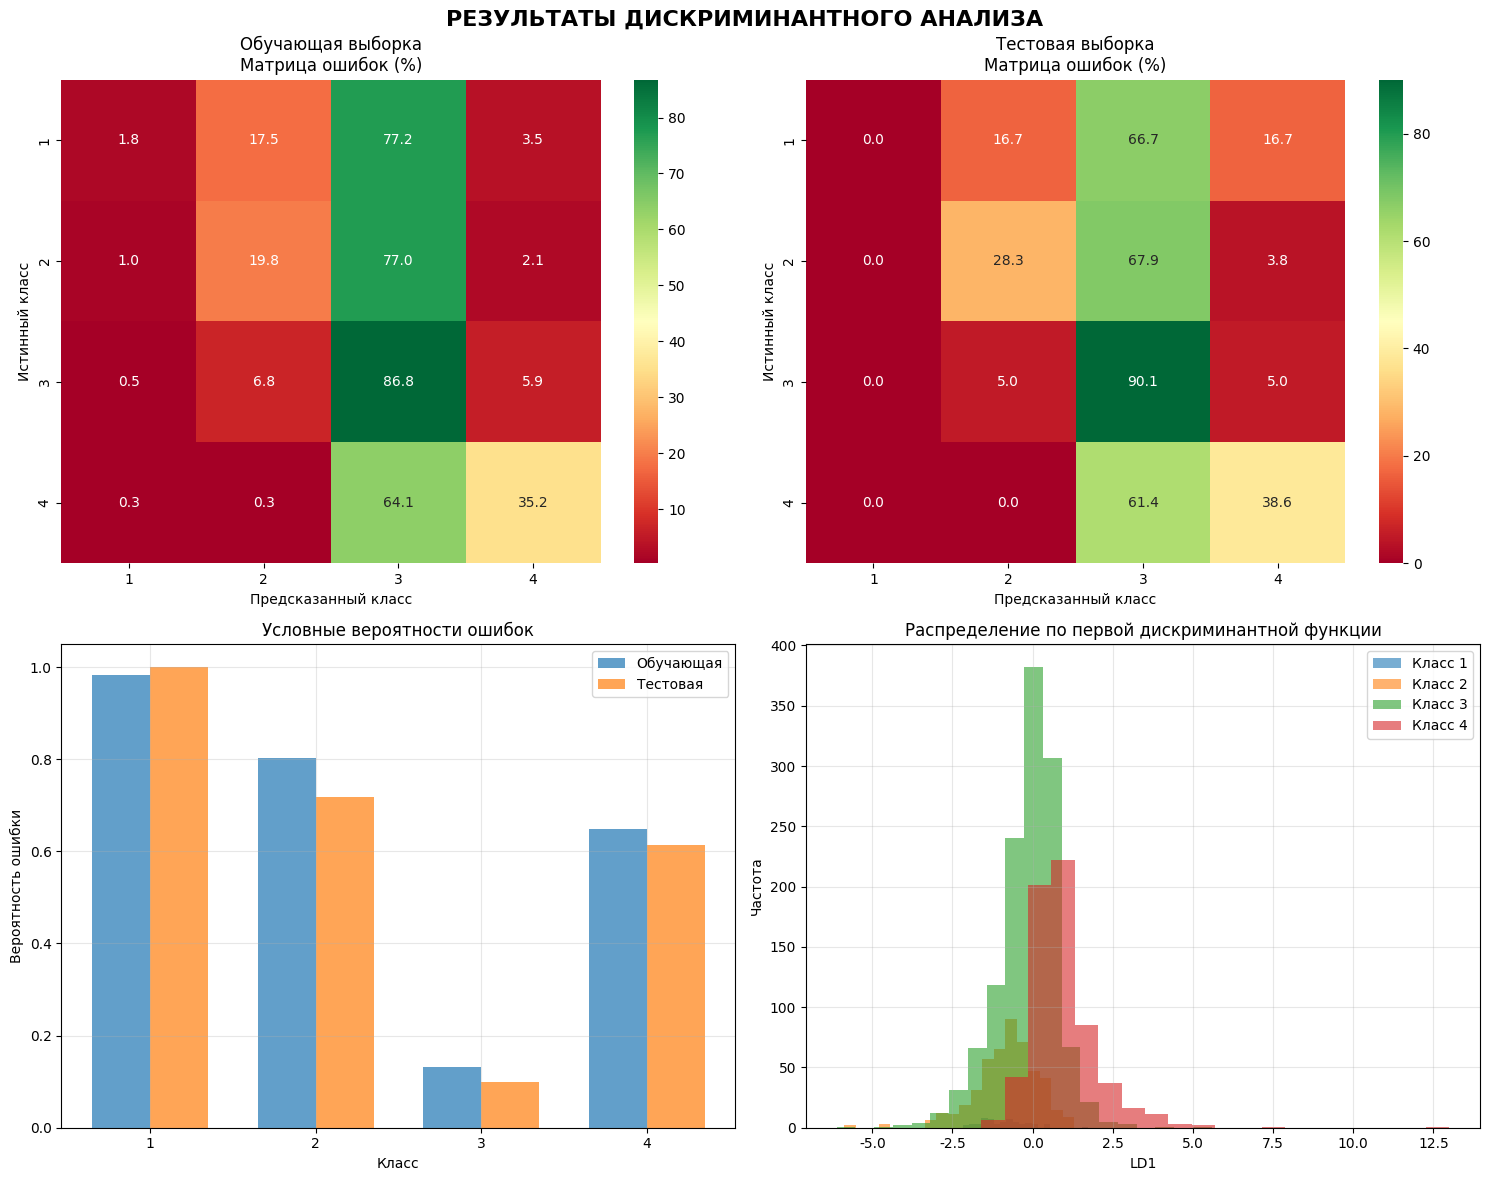

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('РЕЗУЛЬТАТЫ ДИСКРИМИНАНТНОГО АНАЛИЗА', fontsize=16, fontweight='bold')

sns.heatmap(cm_train_percent, annot=True, fmt='.1f', cmap='RdYlGn', 
            xticklabels=[1,2,3,4], yticklabels=[1,2,3,4], ax=axes[0,0])
axes[0,0].set_title('Обучающая выборка\nМатрица ошибок (%)')
axes[0,0].set_xlabel('Предсказанный класс')
axes[0,0].set_ylabel('Истинный класс')

sns.heatmap(cm_test_percent, annot=True, fmt='.1f', cmap='RdYlGn',
            xticklabels=[1,2,3,4], yticklabels=[1,2,3,4], ax=axes[0,1])
axes[0,1].set_title('Тестовая выборка\nМатрица ошибок (%)')
axes[0,1].set_xlabel('Предсказанный класс')
axes[0,1].set_ylabel('Истинный класс')

x = np.arange(4)
width = 0.35
axes[1,0].bar(x - width/2, error_train['Условная_вероятность_ошибки'], 
              width, label='Обучающая', alpha=0.7)
axes[1,0].bar(x + width/2, error_test['Условная_вероятность_ошибки'], 
              width, label='Тестовая', alpha=0.7)
axes[1,0].set_title('Условные вероятности ошибок')
axes[1,0].set_xlabel('Класс')
axes[1,0].set_ylabel('Вероятность ошибки')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels([1,2,3,4])
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

X_lda = lda.transform(X_train_scaled)
for class_label in [1, 2, 3, 4]:
    mask = y_train == class_label
    axes[1,1].hist(X_lda[mask, 0], alpha=0.6, label=f'Класс {class_label}', bins=20)
axes[1,1].set_title('Распределение по первой дискриминантной функции')
axes[1,1].set_xlabel('LD1')
axes[1,1].set_ylabel('Частота')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Итоговый отчет

In [20]:
print("ИТОГОВЫЙ ОТЧЕТ ПО ДИСКРИМИНАНТНОМУ АНАЛИЗУ")

print(f"КАЧЕСТВО КЛАССИФИКАЦИИ:")
print(f"   - Точность на обучающей выборке: {lda.score(X_train_scaled, y_train)*100:.1f}%")
print(f"   - Точность на тестовой выборке: {lda.score(X_test_scaled, y_test)*100:.1f}%")
print(f"   - Безусловная вероятность ошибки: {unconditional_error_test*100:.1f}%")


ИТОГОВЫЙ ОТЧЕТ ПО ДИСКРИМИНАНТНОМУ АНАЛИЗУ
КАЧЕСТВО КЛАССИФИКАЦИИ:
   - Точность на обучающей выборке: 58.2%
   - Точность на тестовой выборке: 62.6%
   - Безусловная вероятность ошибки: 37.4%
